In [24]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [25]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [26]:
df.shape

(1067, 13)

In [27]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


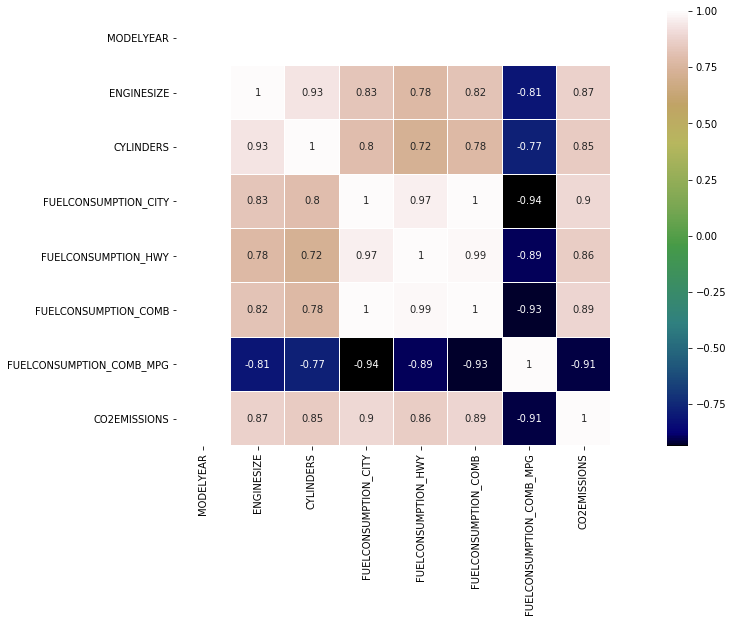

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='gist_earth', square=True)

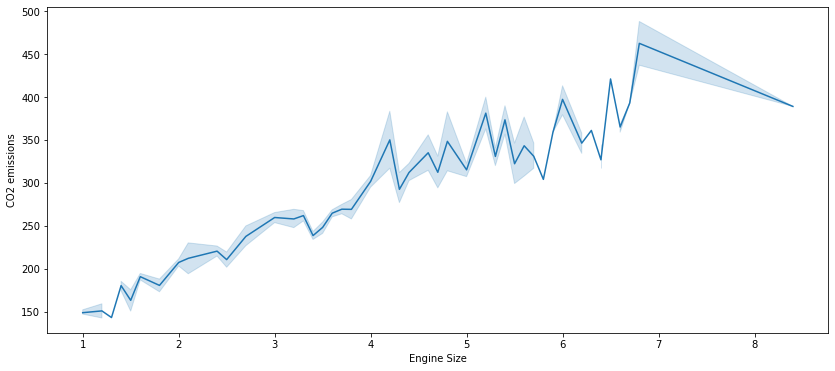

In [30]:
# ploting graph engine size & CO2 emissions
plt.figure(figsize=(14,6))
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])
plt.xlabel('Engine Size')
plt.ylabel('CO2 emissions')
plt.show()

#### The lineplot has positive correlation between the engin size and the carbon emission. With some variation, we can see that the bigger the engine the greater the levels of CO2 emited. 

## Spliting data to train the model

In [31]:
# importing necessary libraries

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [32]:
X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

In [33]:
# spliting data in train and test with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# Linear Equation 
# Y = MX + C
# "M" is slop(coef_) and "C" is intercept(intercept_)
print('intercept is :',model.intercept_)
print('Slop is :',model.coef_)

intercept is : [126.12831348]
Slop is : [[39.0337167]]


## Linear regression model

In [43]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

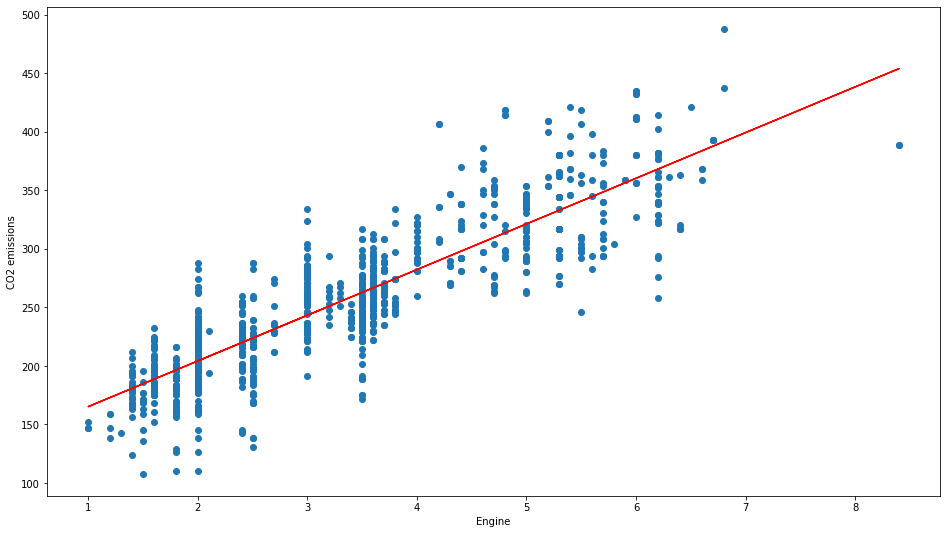

In [44]:
plt.figure(figsize=(16,9))
plt.scatter(X, y)
plt.plot(X, model.coef_[0][0]*X + model.intercept_[0], '-r') 
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

In [45]:
predictCO2 = model.predict(X_test)
predictCO2

array([[344.71712699],
       [204.19574688],
       [196.38900354],
       [208.09911855],
       [340.81375532],
       [196.38900354],
       [251.03620691],
       [270.55306526],
       [266.64969359],
       [204.19574688],
       [368.13735701],
       [196.38900354],
       [243.22946357],
       [262.74632192],
       [204.19574688],
       [266.64969359],
       [282.26318027],
       [333.00701198],
       [204.19574688],
       [204.19574688],
       [219.80923356],
       [243.22946357],
       [333.00701198],
       [196.38900354],
       [368.13735701],
       [204.19574688],
       [258.84295025],
       [274.45643693],
       [188.5822602 ],
       [188.5822602 ],
       [368.13735701],
       [262.74632192],
       [243.22946357],
       [204.19574688],
       [223.71260523],
       [188.5822602 ],
       [188.5822602 ],
       [274.45643693],
       [243.22946357],
       [196.38900354],
       [305.68341029],
       [223.71260523],
       [333.00701198],
       [196

In [46]:
model.score(X_test,y_test)

0.7950862694245493

##  polynomial linear regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly_reg=PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
x_train_poly= poly_reg.transform(X_train)
x_test_poly= poly_reg.transform(X_test)

In [49]:
print(x_train_poly.shape)
print(x_test_poly.shape)

(853, 3)
(214, 3)


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.score(x_test_poly, y_test)

0.7963741952275931

In [53]:
y_pred=lr.predict(x_test_poly)
y_pred

array([[342.7888659 ],
       [202.85662575],
       [193.91329466],
       [207.28213401],
       [339.44036082],
       [193.91329466],
       [253.93180462],
       [273.90533957],
       [269.97217562],
       [202.85662575],
       [362.23369446],
       [193.91329466],
       [245.72699001],
       [266.00824015],
       [202.85662575],
       [269.97217562],
       [285.5202023 ],
       [332.65103611],
       [202.85662575],
       [202.85662575],
       [220.37402969],
       [245.72699001],
       [332.65103611],
       [193.91329466],
       [362.23369446],
       [202.85662575],
       [262.01353316],
       [277.807732  ],
       [184.8468775 ],
       [184.8468775 ],
       [362.23369446],
       [266.00824015],
       [245.72699001],
       [202.85662575],
       [224.67645187],
       [184.8468775 ],
       [184.8468775 ],
       [277.807732  ],
       [245.72699001],
       [193.91329466],
       [307.91909674],
       [224.67645187],
       [332.65103611],
       [193

### calculate mean absolute error

In [59]:
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - y_test)**2)}') 
print(f'Mean squared error (MSE): {mean_squared_error(y_test, predictCO2)}') 
print(f'Mean absolute error (MAE): {mean_absolute_error(y_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(y_test, predictCO2))}')
print(f'R2-score: {r2_score(predictCO2, y_test)}')

Sum of squared error (SSE): CO2EMISSIONS    173538.76114
dtype: float64
Mean squared error (MSE): 810.9287903751424
Mean absolute error (MAE): 22.02916246249771
Sqrt of mean squared error (RMSE):  28.476811450286046
R2-score: 0.7349646985578311
